In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.optimize as opt


layer_size = 400 # 20x20 pixels
num_labels = 10

data = scipy.io.loadmat("ex3data1.mat")
x = data['X']
y = data['y']
zero = np.argwhere(y==10)
y[zero] = 0
m = x.shape[0]
print(x.shape)
print(y.shape)
print(m)

(5000, 400)
(5000, 1)
5000


In [3]:
rand_indexes = np.random.randint(0, 5000, 100)
rand_X = x[rand_indexes, :]
print(rand_X.shape)

(100, 400)


100
(100, 20, 20)


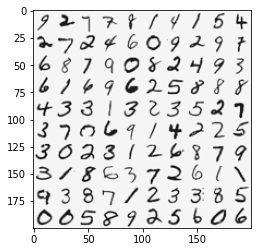

In [4]:
def displayData(x, example_width=20):
    m = x.shape[0]
    data_sets = np.zeros((m, example_width, example_width), dtype=np.float64)
    print(m)
    print(data_sets.shape)
    for row_i in range(m):
        data_sets[row_i] = np.reshape(x[row_i], (example_width, example_width)).T

    m = float(m)
    canvas = np.zeros((example_width * 10, example_width * 10))
    k = 0
    for i in range(10):
        for j in range(10):
            pos_x = i*20
            pos_y = j*20
            canvas[pos_x:pos_x+example_width, pos_y:pos_y+example_width] = data_sets[k]
            k += 1

    plt.imshow(canvas, cmap='Greys')

displayData(rand_X)

In [5]:
def sigmoid(z):
    g = np.zeros(np.size(z))
    g = 1/(1 + np.exp(-z))
    return g

In [6]:
def costFunction(theta, x, y, lam):
    m = np.size(y)
    J = 0
    h = sigmoid(x @ theta)
    theta_1 = np.hstack((0, theta[1:]))
    p = lam * (theta_1.T @ theta_1)/(2 * m)
    J = ((-y).T @ np.log(h) - (1 - y).T @ np.log(1 - h))/m + p
    return J

In [7]:
def grad(theta, x, y ,lam):
    m = np.size(y)
    grad = np.zeros_like(theta)
    h = sigmoid(x @ theta)
    theta_1 = np.hstack((0, theta[1:]))
    #print("h.shape = {} /n y.shape = {}".format(h.shape, y.shape))
    error = h - y
    grad = (x.T @ (error) + lam * theta_1)/m
    return grad

In [8]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.arange(1, 16, 1)
X_t = np.reshape(X_t, (3, 5)).T /10.0
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3.0
print("CostFunction = {}".format(costFunction(theta_t, X_t, y_t, lambda_t)))
print("grad = {}".format(grad(theta_t, X_t, y_t, lambda_t)))

CostFunction = 2.5348193961097443
grad = [ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [12]:
def oneVsAll(x, y, num_labels, lam):
    m = x.shape[0]
    n = x.shape[1]
    all_theta = np.zeros((num_labels, n + 1))
    x = np.hstack((np.ones((m,1)), x))
    k = 10
    initial_theta = np.zeros((n + 1,))
    for i in range(0, num_labels):
        theta = opt.fmin_cg(costFunction, x0=initial_theta, fprime=grad, args=(x, (y == i).astype('int')[:,0], lam))
        all_theta[i] = theta.T

    return all_theta


lam = 0.1
theta = oneVsAll(x, y, 10, lam)

Optimization terminated successfully.
         Current function value: 0.008572
         Iterations: 108
         Function evaluations: 422
         Gradient evaluations: 422
Optimization terminated successfully.
         Current function value: 0.013120
         Iterations: 108
         Function evaluations: 423
         Gradient evaluations: 423
Optimization terminated successfully.
         Current function value: 0.050809
         Iterations: 209
         Function evaluations: 633
         Gradient evaluations: 633
Optimization terminated successfully.
         Current function value: 0.057622
         Iterations: 203
         Function evaluations: 601
         Gradient evaluations: 601
Optimization terminated successfully.
         Current function value: 0.033100
         Iterations: 203
         Function evaluations: 665
         Gradient evaluations: 665
Optimization terminated successfully.
         Current function value: 0.054476
         Iterations: 268
         Function ev

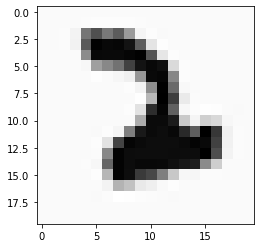

In [15]:
digit = np.array(x[1200,:])
digit = np.reshape(digit, (20,20)).T
plt.imshow(digit, cmap='Greys')

In [1]:
def predictOneVsAll(all_theta, x):
    x = x.T
    x = np.reshape(x, 400)
    x = np.hstack(((1, x)))
    p = np.zeros(1)
    h = sigmoid(x @ all_theta.T)
    p = np.argmax(h)
    return p

predictOneVsAll(theta, digit)

NameError: name 'theta' is not defined